In [1]:
import sys
sys.executable

'/Users/sakshi/opt/anaconda3/bin/python'

In [2]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install scikit-learn
%pip install keras
%pip install opencv-python
%pip install pydot
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import cv2
import pydot

2024-03-30 21:41:29.975506: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
#load_dataset function to load the data and resize the images to 50x50
def load_dataset(directory):
  images = []
  labels = []
  for idx, label in enumerate(uniq_labels):
    for file in os.listdir(directory + '/'+label):
      filepath = directory +'/'+ label + "/" + file
      img = cv2.resize(cv2.imread(filepath),(50,50))
      images.append(img)
      labels.append(idx)
  images = np.asarray(images)
  labels = np.asarray(labels)
  return images, labels

In [5]:
#display_images function to show examples
def display_images(x_data,y_data, title, display_label = True):
    x, y = x_data,y_data
    fig, axes = plt.subplots(5, 8, figsize = (18, 5))
    fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
    fig.suptitle(title, fontsize = 18)
    for i, ax in enumerate(axes.flat):
        ax.imshow(cv2.cvtColor(x[i], cv2.COLOR_BGR2RGB))
        if display_label:
            ax.set_xlabel(uniq_labels[y[i]])
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder

def load_dataset(directory):
    images = []
    labels = []

    label_encoder = LabelEncoder()

    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)

        # Check if the item is a directory
        if os.path.isdir(label_path):
            for file in os.listdir(label_path):
                filepath = os.path.join(label_path, file)

                # Load the image and check if it's valid
                img = cv2.imread(filepath)
                if img is not None:
                    img = cv2.resize(img, (50, 50))
                    images.append(img)
                    labels.append(label)

    images = np.asarray(images)
    labels = label_encoder.fit_transform(labels)

    return images, labels

In [7]:
data_dir = r'/Users/sakshi/Desktop/input/classification_frames/Images'
uniq_labels = sorted(os.listdir(data_dir))
X_pre, Y_pre = load_dataset(data_dir)

# Split the dataset into training, testing, and evaluation sets
X_train, X_test, Y_train, Y_test = train_test_split(X_pre, Y_pre, test_size=0.2, random_state=42)
X_test, X_eval, Y_test, Y_eval = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

# Print shapes of each set
print("Train images shape", X_train.shape, Y_train.shape)
print("Test images shape", X_test.shape, Y_test.shape)
print("Evaluate image shape", X_eval.shape, Y_eval.shape)

# Print the labels and their count
print("Printing the labels", uniq_labels, len(uniq_labels))

Train images shape (42664, 50, 50, 3) (42664,)
Test images shape (5333, 50, 50, 3) (5333,)
Evaluate image shape (5334, 50, 50, 3) (5334,)
Printing the labels ['.DS_Store', 'P1042751_720', 'P1042756_720', 'P1042757_720', 'P1042762_720', 'P1042767_720', 'P1042772_720', 'P1042777_720', 'P1042780_720', 'P1042787_720', 'P1042793_720', 'P1042797_720', 'P1043066_720', 'P1043067_720', 'P1043068_720', 'P1043075_720', 'P1043076_720', 'P1043078_720', 'P1043079_720', 'P1043080_720', 'P1043081_720', 'P1043086_720', 'P1043087_720', 'P1043089_720', 'P1043106_720', 'P1043115_720', 'P1043116_720', 'P1043117_720', 'P1043118_720', 'P1043119_720', 'P1043120_720', 'P1043121_720', 'P1043122_720', 'P1043123_720', 'P1043124_720', 'P1043125_720', 'P1043126_720', 'P1043127_720', 'P1043128_720', 'P1043130_720', 'P1043131_720', 'P1043132_720', 'P1043133_720', 'P1043134_720', 'P1043135_720'] 45


Train images shape (42664, 50, 50, 3) (42664,)
Test images shape (5333, 50, 50, 3) (5333,)
Evaluate image shape (5334, 50, 50, 3) (5334,)
Printing the labels ['.DS_Store', 'P1042751_720', 'P1042756_720', 'P1042757_720', 'P1042762_720', 'P1042767_720', 'P1042772_720', 'P1042777_720', 'P1042780_720', 'P1042787_720', 'P1042793_720', 'P1042797_720', 'P1043066_720', 'P1043067_720', 'P1043068_720', 'P1043075_720', 'P1043076_720', 'P1043078_720', 'P1043079_720', 'P1043080_720', 'P1043081_720', 'P1043086_720', 'P1043087_720', 'P1043089_720', 'P1043106_720', 'P1043115_720', 'P1043116_720', 'P1043117_720', 'P1043118_720', 'P1043119_720', 'P1043120_720', 'P1043121_720', 'P1043122_720', 'P1043123_720', 'P1043124_720', 'P1043125_720', 'P1043126_720', 'P1043127_720', 'P1043128_720', 'P1043130_720', 'P1043131_720', 'P1043132_720', 'P1043133_720', 'P1043134_720', 'P1043135_720'] 45


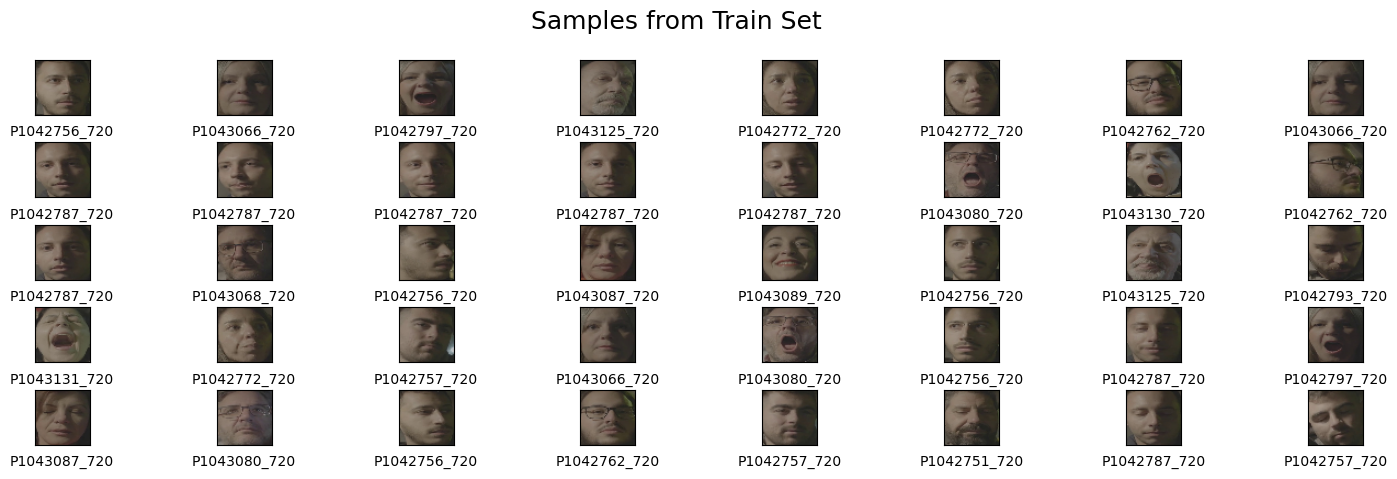

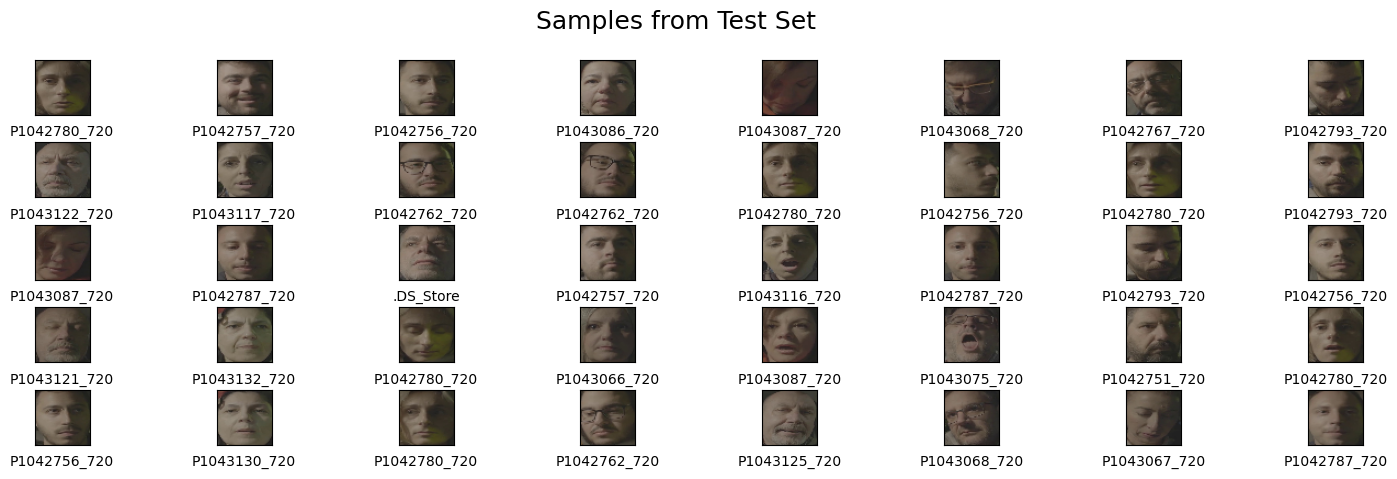

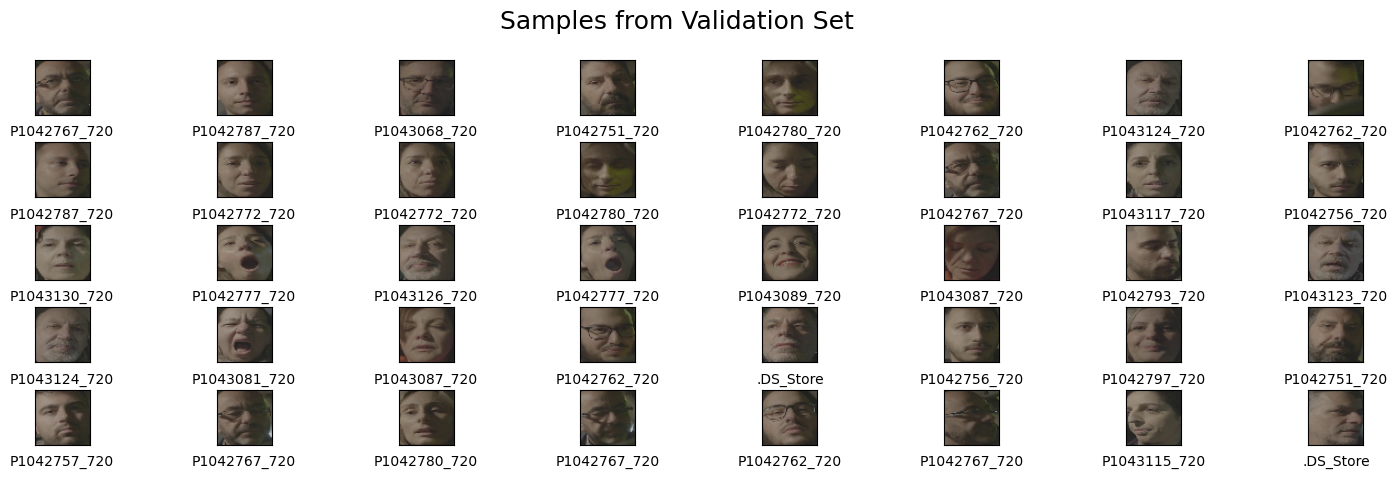

In [8]:
# Load the dataset
data_dir = r'/Users/sakshi/Desktop/input/classification_frames/Images'
uniq_labels = sorted(os.listdir(data_dir))
X_pre, Y_pre = load_dataset(data_dir)

# Split the dataset into training, testing, and evaluation sets
X_train, X_test, Y_train, Y_test = train_test_split(X_pre, Y_pre, test_size=0.2, random_state=42)
X_test, X_eval, Y_test, Y_eval = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

# Print shapes of each set
print("Train images shape", X_train.shape, Y_train.shape)
print("Test images shape", X_test.shape, Y_test.shape)
print("Evaluate image shape", X_eval.shape, Y_eval.shape)

# Printing the labels and their count
print("Printing the labels", uniq_labels, len(uniq_labels))

# Display examples
display_images(X_train, Y_train, 'Samples from Train Set')
display_images(X_test, Y_test, 'Samples from Test Set')
display_images(X_eval, Y_eval, 'Samples from Validation Set')

In [9]:
# Convert labels to one-hot encoding
num_classes = len(uniq_labels)
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)
Y_eval = to_categorical(Y_eval, num_classes)

# Normalize pixel values
X_train = X_train / 255.
X_test = X_test / 255.
X_eval = X_eval / 255.

In [10]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Assuming your model's output layer has 'num_classes' units
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(50,50,3)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=10, verbose=1,
                    validation_data=(X_eval, Y_eval))

Epoch 1/10
1334/1334 [==============================] - 414s 307ms/step - loss: 1.2935 - accuracy: 0.6257 - val_loss: 0.6023 - val_accuracy: 0.7998
Epoch 2/10
1334/1334 [==============================] - 383s 287ms/step - loss: 0.4117 - accuracy: 0.8577 - val_loss: 0.3462 - val_accuracy: 0.8798
Epoch 3/10
1334/1334 [==============================] - 359s 269ms/step - loss: 0.2994 - accuracy: 0.8949 - val_loss: 0.2210 - val_accuracy: 0.9233
Epoch 4/10
1334/1334 [==============================] - 352s 264ms/step - loss: 0.2359 - accuracy: 0.9170 - val_loss: 0.1973 - val_accuracy: 0.9319
Epoch 5/10
1334/1334 [==============================] - 9218s 7s/step - loss: 0.1967 - accuracy: 0.9300 - val_loss: 0.2475 - val_accuracy: 0.9113
Epoch 6/10
1334/1334 [==============================] - 276s 207ms/step - loss: 0.1711 - accuracy: 0.9380 - val_loss: 0.1394 - val_accuracy: 0.9537
Epoch 7/10
1334/1334 [==============================] - 312s 234ms/step - loss: 0.1421 - accuracy: 0.9504 - val_lo

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 16)        2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 16)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 32)        4640      
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 32)        9248      
                                                        

In [12]:
#testing
model.evaluate(X_test, Y_test)

167/167 [==============================] - 7s 42ms/step - loss: 0.0872 - accuracy: 0.9689


[0.0872001200914383, 0.9688730835914612]

In [13]:
from tensorflow.keras.models import load_model

# Assuming you have already imported and built your model with Keras
# model = ... (your model definition here)

# Save the model
model.save('/Users/sakshi/Desktop/input/TestModel.h5')

# Load the model
loaded_model = load_model('/Users/sakshi/Desktop/input/TestModel.h5')

/Users/sakshi/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

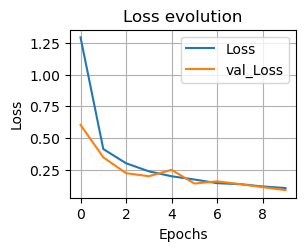

In [15]:
#ploting training and validation loss vs. epochs
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('/Users/sakshi/Desktop/loss_plot.png')
plt.show()

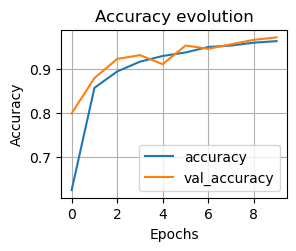

In [16]:
#ploting training and validation accuracy vs. epochs
plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('/Users/sakshi/Desktop/acc_plot.png')
plt.show()

In [17]:
import numpy as np

combined_loss = history.history['loss'] + history.history['val_loss']
overall_loss = np.mean(combined_loss)

combined_accuracy = history.history['accuracy'] + history.history['val_accuracy']
overall_accuracy = np.mean(combined_accuracy)

print(f"Loss: {overall_loss:.4f}")
print(f"Accuracy: {overall_accuracy:.4f}")

Loss: 0.2674
Accuracy: 0.9116


In [23]:
import cv2
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import os
import pyttsx3

In [24]:
import os

model_path = '/Users/sakshi/Desktop/input/TestModel.h5'
full_path = os.path.abspath(model_path)

model = tf.keras.models.load_model(full_path)

In [25]:
# engine = pyttsx3.init()
# load saved model from PC
model = tf.keras.models.load_model(
    r'/Users/sakshi/Desktop/input/TestModel.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 16)        2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 16)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 32)        4640      
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 32)        9248      
                                                        

In [26]:
train_dir = r'/Users/sakshi/Desktop/input/archive'
# getting the labels form data directory
labels = sorted(os.listdir(train_dir))
labels[-1] = 'Nothing'
print(labels)

['.DS_Store', 'coco_annotations', 'data.yaml', 'test', 'train', 'Nothing']


In [27]:
! pip install pyttsx3
import cv2
import numpy as np
import tensorflow as tf
import pyttsx3

# Load saved model from PC
model = tf.keras.models.load_model(r'/Users/sakshi/Desktop/input/TestModel.h5')
model.summary()

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 16)        2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 16)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 32)        4640      
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 32)        9248      
                                                        

In [28]:
!pip install imutils

In [ ]:
import cv2
import numpy as np
import dlib
import imutils
from scipy.spatial import distance as dist
from imutils.video import VideoStream
from imutils import face_utils
from threading import Thread
import time
import playsound
import os

def sound_alarm(path):
    global alarm_status
    global alarm_status2
    global saying

    while alarm_status:
        print('Closed Eyes Detected')
        playsound.playsound(path)
    if alarm_status2:
        print('Yawn Detected')
        saying = True
        playsound.playsound(path)
        saying = False

def eye_aspect_ratio(eye):
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])

    C = dist.euclidean(eye[0], eye[3])

    ear = (A + B) / (2.0 * C)

    return ear

def final_ear(shape):
    (lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
    (rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

    leftEye = shape[lStart:lEnd]
    rightEye = shape[rStart:rEnd]

    leftEAR = eye_aspect_ratio(leftEye)
    rightEAR = eye_aspect_ratio(rightEye)

    ear = (leftEAR + rightEAR) / 2.0
    return (ear, leftEye, rightEye)

def lip_distance(shape):
    top_lip = shape[50:53]
    top_lip = np.concatenate((top_lip, shape[61:64]))

    low_lip = shape[56:59]
    low_lip = np.concatenate((low_lip, shape[65:68]))

    top_mean = np.mean(top_lip, axis=0)
    low_mean = np.mean(low_lip, axis=0)

    distance = abs(top_mean[1] - low_mean[1])
    return distance

EYE_AR_THRESH = 0.25
EYE_AR_CONSEC_FRAMES = 20
YAWN_THRESH = 20
alarm_status = False
alarm_status2 = False
saying = False
COUNTER = 0

print("-> Loading the predictor and detector...")
detector = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")    #Faster but less accurate
#detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/Users/sakshi/Downloads/shape_predictor_68_face_landmarks.dat")

print("-> Starting Video Stream")
vs = VideoStream(src=0).start()
time.sleep(1.0)

while True:
    frame = vs.read()
    frame = imutils.resize(frame, width=450)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = detector.detectMultiScale(gray, scaleFactor=1.1,
                                      minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        rect = dlib.rectangle(int(x), int(y), int(x + w), int(y + h))

        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        eye = final_ear(shape)
        ear = eye[0]
        leftEye = eye[1]
        rightEye = eye[2]

        distance = lip_distance(shape)

        leftEyeHull = cv2.convexHull(leftEye)
        rightEyeHull = cv2.convexHull(rightEye)
        cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
        cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)

        lip = shape[48:60]
        cv2.drawContours(frame, [lip], -1, (0, 255, 0), 1)

        if ear < EYE_AR_THRESH:
            COUNTER += 1

            if COUNTER >= EYE_AR_CONSEC_FRAMES:
                if alarm_status == False:
                    alarm_status = True
                    t = Thread(target=sound_alarm,
                               args=('/Users/sakshi/Downloads/loud-beepy-alarm-81101.mp3',))
                    t.daemon = True
                    t.start()

                cv2.putText(frame, "Closed Eyes ALERT!", (10, 30),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

        else:
            COUNTER = 0
            alarm_status = False

        if distance > YAWN_THRESH:
            cv2.putText(frame, "Yawn Alert", (10, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
            if alarm_status2 == False and saying == False:
                alarm_status2 = True
                t = Thread(target=sound_alarm,
                           args=('/Users/sakshi/Downloads/loud-beepy-alarm-81101.mp3',))
                t.daemon = True
                t.start()
        else:
            alarm_status2 = False

        cv2.putText(frame, "EAR: {:.2f}".format(ear), (300, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        cv2.putText(frame, "YAWN: {:.2f}".format(distance), (300, 60),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF

    if key == ord("q"):
        break

cv2.destroyAllWindows()
vs.stop()

-> Loading the predictor and detector...
-> Starting Video Stream
Yawn Detected
Closed Eyes Detected
Closed Eyes Detected
Closed Eyes Detected
Closed Eyes Detected
Yawn Detected
Yawn Detected
Closed Eyes Detected
Closed Eyes Detected
Closed Eyes Detected
Closed Eyes Detected
Closed Eyes Detected
Yawn Detected
Yawn Detected
Closed Eyes Detected
Closed Eyes Detected
Yawn Detected
Yawn Detected
Yawn Detected
Closed Eyes Detected
Closed Eyes Detected
Yawn Detected
Closed Eyes Detected
Closed Eyes Detected
Closed Eyes Detected
Closed Eyes Detected
Closed Eyes Detected
Closed Eyes Detected
Closed Eyes Detected
